In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
attrition= pd.read_csv('Employee_Attrition.csv')
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [57]:
list(attrition.)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

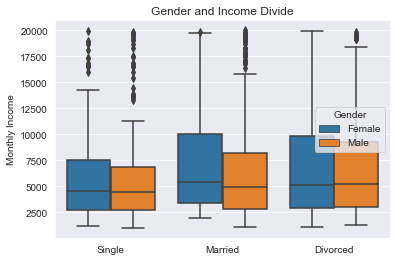

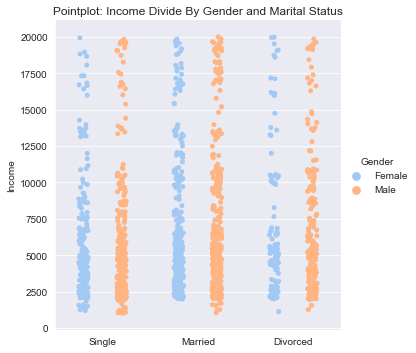

In [96]:
sns.set_style("darkgrid")
g=sns.boxplot(x='MaritalStatus', 
              y='MonthlyIncome', 
              hue='Gender',
              data=attrition)
g.set(xlabel="", ylabel="Monthly Income")
plt.title('Gender and Income Divide')

g = sns.catplot(x='MaritalStatus', y='MonthlyIncome', hue='Gender', data=attrition,
                   kind="strip", palette="pastel",ci=95, dodge=True)
g.set_ylabels("Income")
g.set_xlabels("")
plt.title('Pointplot: Income Divide By Gender and Marital Status')
plt.show()

Plot 1 shows married men and women make more on average than single employees, with many outliers above the whiskers for every group except divorced women. Plot 2 is very inconclusive, showing a similar income distribution across groups.

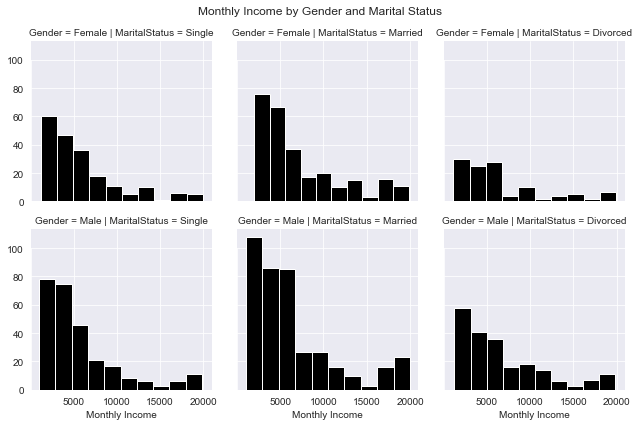

In [94]:
g = sns.FacetGrid(attrition, row="Gender", col="MaritalStatus")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "MonthlyIncome", color="black")
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Monthly Income')
plt.suptitle('Monthly Income by Gender and Marital Status')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


The facet grid gives us a better idea of how the population is distributed, as a great majority of the employees are married men. It does little to describe causation or correlation, as no striking differences are immediately evident across marital or gender lines. 

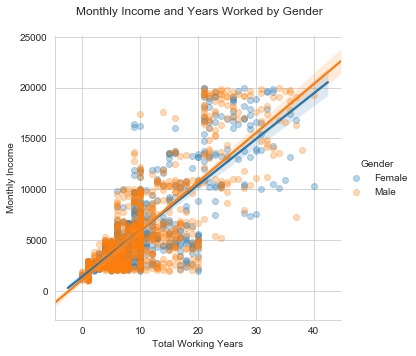

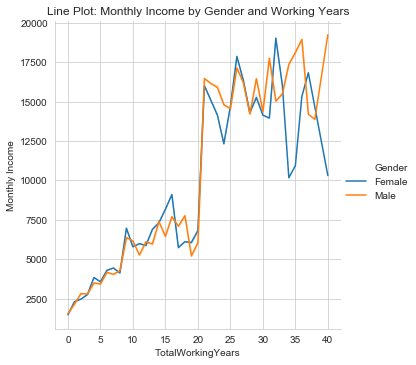

In [107]:
sns.set_style("whitegrid")
p=sns.lmplot(y='MonthlyIncome',
            x='TotalWorkingYears',
            hue='Gender',
            data=attrition,
            fit_reg=True,
            scatter_kws={'alpha':0.3})
p.set_ylabels("Monthly Income")
p.set_xlabels("Total Working Years")
plt.suptitle("Monthly Income and Years Worked by Gender")
plt.subplots_adjust(top=0.9)

p=sns.relplot(x='TotalWorkingYears',
             y='MonthlyIncome',
             hue='Gender',
             kind='line',
              ci=False,
             data=attrition)
plt.title('Line Plot: Monthly Income by Gender and Working Years')
plt.ylabel('Monthly Income')
plt.show()

The density in the bottom left of plot 1 shows a large portion of the employees are paid under 10K, and that the gender pay gap stays very thin regardless of the total working years. The second plot highlights the sharp wage increase at 20 years experienced by both genders. 

In [108]:
Pitching= pd.read_csv("Pitching.csv")
Pitching.head(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [109]:
Pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,...,32121.000000,46699.000000,45965.000000,46699.000000,46696.000000,46699.000000,46699.000000,27512.000000,27512.000000,26381.000000
mean,1970.476498,1.080901,4.644468,4.644468,23.695861,9.341827,3.036403,0.432921,1.501167,250.026617,...,2.340649,2.616330,2.384140,0.298636,356.709247,6.301827,42.376111,2.791582,2.216996,5.946211
std,38.009031,0.287667,5.760254,4.950416,18.557884,12.221776,6.974422,1.092617,5.003730,255.016879,...,2.734361,3.699836,3.164046,0.748765,357.066334,9.947505,42.854273,3.279006,2.372667,6.370744
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,1980.000000,1.000000,2.000000,3.000000,21.000000,2.000000,0.000000,0.000000,0.000000,163.000000,...,1.000000,2.000000,1.000000,0.000000,237.000000,3.000000,27.000000,2.000000,1.000000,4.000000
75%,2003.000000,1.000000,7.000000,7.000000,35.000000,17.000000,2.000000,0.000000,1.000000,386.000000,...,4.000000,4.000000,3.000000,0.000000,553.000000,8.000000,66.000000,4.000000,3.000000,9.000000
max,2018.000000,5.000000,60.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,83.000000,54.000000,16.000000,2906.000000,84.000000,519.000000,27.000000,17.000000,47.000000


In [110]:
list(Pitching.columns)

['playerID',
 'yearID',
 'stint',
 'teamID',
 'lgID',
 'W',
 'L',
 'G',
 'GS',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'ERA',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
 'SH',
 'SF',
 'GIDP']

In [119]:
player_by_career= Pitching.groupby('playerID').sum()
player_by_career

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,18084,9,16,18,331,0,0,0,69,1011,...,22.0,12,16.0,1,1475.0,141,169,17.0,11.0,21.0
aasedo01,25786,13,66,60,448,91,22,5,82,3328,...,45.0,22,7.0,3,4730.0,235,503,50.0,34.0,106.0
abadfe01,18124,10,8,27,363,6,0,0,2,953,...,10.0,9,12.0,2,1350.0,96,137,7.0,12.0,22.0
abbeybe01,11365,7,22,40,79,65,52,0,1,1704,...,0.0,18,26.0,0,2568.0,14,442,0.0,0.0,0.0
abbeych01,1896,1,0,0,1,0,0,0,0,6,...,0.0,1,0.0,0,12.0,1,3,0.0,0.0,0.0
abbotda01,1890,1,0,2,3,1,1,0,1,39,...,0.0,3,1.0,0,67.0,2,14,0.0,0.0,0.0
abbotgl01,23743,13,62,83,248,206,37,5,0,3858,...,28.0,18,32.0,5,5508.0,13,707,60.0,39.0,111.0
abbotji01,21932,12,87,108,263,254,31,6,0,5022,...,30.0,53,32.0,11,7211.0,5,880,70.0,47.0,200.0
abbotky01,7974,4,4,17,57,22,0,0,0,556,...,0.0,13,2.0,3,815.0,4,112,10.0,6.0,18.0


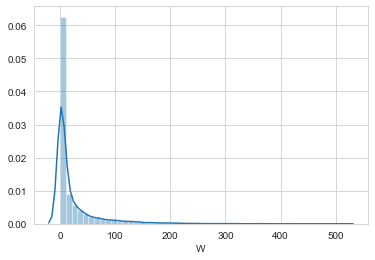

In [120]:
sns.distplot(player_by_career['W'])

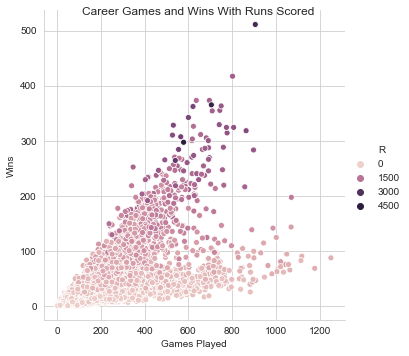

In [123]:
g= sns.relplot(x='G',
           y= 'W',
           hue='R',
           data=player_by_career)
g.set_ylabels('Wins')
g.set_xlabels('Games Played')
plt.suptitle('Career Games and Wins With Runs Scored')
plt.show()

The graph shows that pitchers who record more wins and games played during their career gave up more runs as they played in more games. It was much less common to play many games and record few wins without giving up runs.

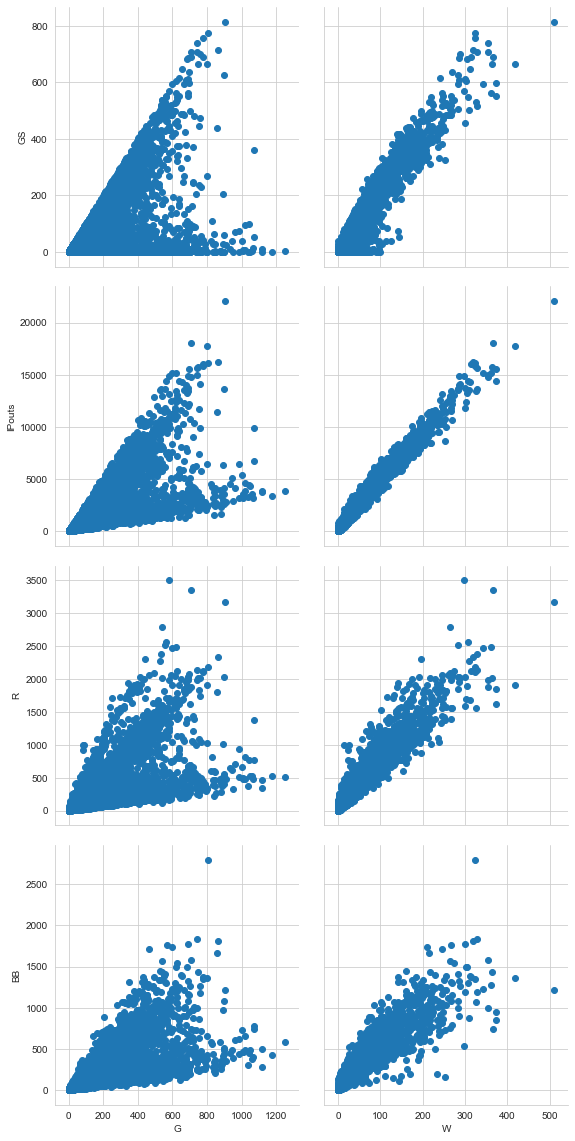

In [132]:
p= sns.PairGrid(player_by_career, x_vars=['G', 'W'], y_vars=['GS', 'IPouts', 'R', 'BB'], height= 4)
p.map(plt.scatter)

The strongest correlation above lies in the intersection of Wins and Innings Pitched, leading us to conclude that winning pitchers get the opportunity to play more innings. Pitchers with more wins walked batters just as often as players who had played in more games, so walks must not have a very strong relationship with getting a win.  